In [23]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

from keras import optimizers

print(tf.__version__)

1.11.0


In [24]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [26]:
train_labels=train_labels.reshape(50000,)
test_labels=test_labels.reshape(10000,)

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [27]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=tf.nn.relu), #can alter this 128 layers
    keras.layers.Dense(128, activation=tf.nn.relu), #can alter this 128 layers
    keras.layers.Dense(64, activation=tf.nn.relu),
   # keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [29]:
model.compile(keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train on 33500 samples, validate on 16500 samples
Epoch 1/30
33500/33500 [==============================] - 13s 381us/step - loss: 1.9542 - acc: 0.2804 - val_loss: 1.8041 - val_acc: 0.3450
Epoch 2/30
33500/33500 [==============================] - 12s 359us/step - loss: 1.7646 - acc: 0.3594 - val_loss: 1.7612 - val_acc: 0.3627
Epoch 3/30
33500/33500 [==============================] - 12s 360us/step - loss: 1.6891 - acc: 0.3925 - val_loss: 1.6863 - val_acc: 0.3978
Epoch 4/30
33500/33500 [==============================] - 12s 353us/step - loss: 1.6387 - acc: 0.4096 - val_loss: 1.6303 - val_acc: 0.4211
Epoch 5/30
33500/33500 [==============================] - 12s 372us/step - loss: 1.5942 - acc: 0.4241 - val_loss: 1.6286 - val_acc: 0.4255
Epoch 6/30
33500/33500 [==============================] - 12s 358us/step - loss: 1.5573 - acc: 0.4435 - val_loss: 1.5961 - val_acc: 0.4329
Epoch 7/30
33500/33500 [==============================] - 12s 357us/step - loss: 1.5260 - acc: 0.4505 - val_loss: 1.

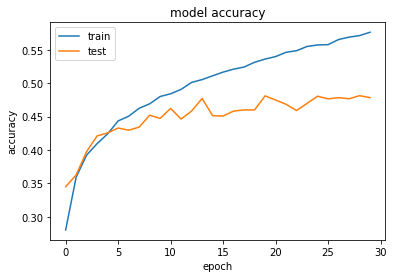

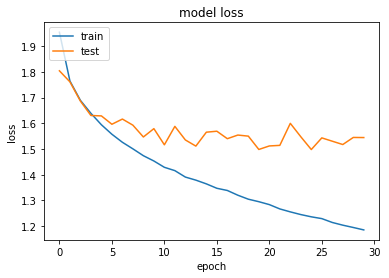

In [30]:
history = model.fit(train_images, train_labels, validation_split=0.33, epochs=30)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1_acc.png', bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1_loss.png', bbox_inches='tight')
plt.show()

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/step
Test accuracy: 0.4778


In [32]:
predictions = model.predict(test_images)

In [33]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[0.03843929 0.02755644 0.07236617 0.3394459  0.15946707 0.20728217
 0.0357925  0.04921708 0.05372038 0.01671306]
3
3


In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

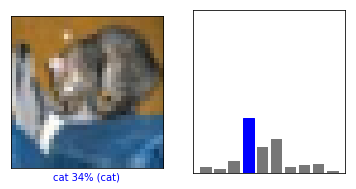

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

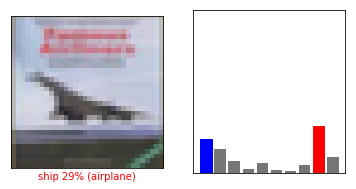

In [36]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

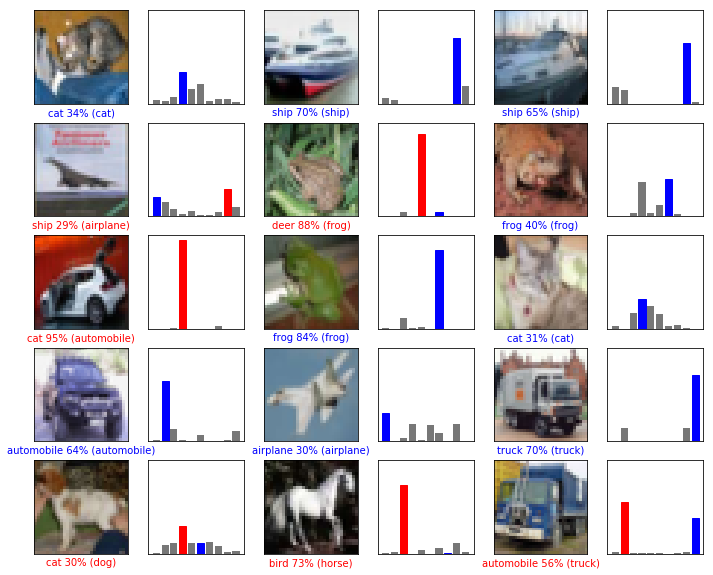

In [37]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.savefig('model_values.png', bbox_inches='tight')

In [44]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)

(32, 32, 3)
(1, 32, 32, 3)
[[0.03843932 0.02755648 0.07236621 0.3394457  0.15946689 0.20728226
  0.03579248 0.04921711 0.05372043 0.01671307]]


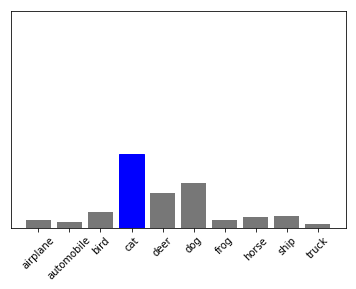

In [46]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.savefig('imagestats.png', bbox_inches='tight')

In [39]:
import mlflow.keras
mlflow.keras.save_model(model, 'model1')